# Import the Nesscessary Packages

In [ ]:
# Imports all the packages used for the program
import numpy as np
import platform
import pandas as pd
import math
from scipy.constants import Stefan_Boltzmann, gravitational_constant
import seaborn as sns
import matplotlib.pyplot as plt


# Interpreting the data from a CSV file

In [ ]:
# Used to read the csv file and store the data as a pandas dataframe
df = pd.read_csv('/content/NASA_Kelper_Dataset_2024.csv')
print(df)

         kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0     10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1     10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2     10811496  K00753.01       CANDIDATE        CANDIDATE      0.000   
3     10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4     10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...        ...        ...             ...              ...        ...   
9559  10090151  K07985.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
9560  10128825  K07986.01       CANDIDATE        CANDIDATE      0.497   
9561  10147276  K07987.01  FALSE POSITIVE   FALSE POSITIVE      0.021   
9562  10155286  K07988.01       CANDIDATE        CANDIDATE      0.092   
9563  10156110  K07989.01  FALSE POSITIVE   FALSE POSITIVE      0.000   

      koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0                 0              0         

In [ ]:
df.info() # Used to print the basic info of a Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   koi_disposition    9564 non-null   object 
 3   koi_pdisposition   9564 non-null   object 
 4   koi_score          8054 non-null   float64
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9110 non-null   float64
 11  koi_period_err2    9110 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9110 non-null   float64
 14  koi_time0bk_err2   9110 non-null   float64
 15  koi_impact         9201 non-null   float64
 16  koi_impact_err1    9110 

In [ ]:
df.head() # Prints the first 5 records of the Dataframe

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
df.describe() # Gives a detailed insight on the data

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


# Calculations

## Calculating the ESI - ( Habitability Index )

In [ ]:
# Used as constants for calculations
earth_solar_radii = 0.009168
earth_stellar_flux = 1.0

# List used to store the calculate ESI Scores
ESI_scores = []

# Used to Calculate the ESI Scores
for i,j in zip(range(len(df)),range(len(df))):
  planet_solar_radii = df['koi_srad'][i] # Gets the Solar Radii for each exoplanet
  planet_stellar_flux = df["koi_insol"][j] # Gets the Stellar Flux for each exoplanet

  # The Formula used to calculate the ESI -  https://phl.upr.edu/projects/earth-similarity-index-esi#h.x6l1fpfsvv4t
  S = 0.5 * (((planet_stellar_flux - earth_stellar_flux) / (planet_stellar_flux + earth_stellar_flux))**2 +
           ((planet_solar_radii - earth_solar_radii) / (planet_solar_radii + earth_solar_radii))**2)
  ESI = 1 - math.sqrt(S)

  # Used to add the calculated results to the list
  ESI_scores.append(ESI)


In [ ]:
# Store the ESI Values in the data frame
df['ESI'] = ESI_scores
print(df)

         kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0     10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1     10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2     10811496  K00753.01       CANDIDATE        CANDIDATE      0.000   
3     10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4     10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...        ...        ...             ...              ...        ...   
9559  10090151  K07985.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
9560  10128825  K07986.01       CANDIDATE        CANDIDATE      0.497   
9561  10147276  K07987.01  FALSE POSITIVE   FALSE POSITIVE      0.021   
9562  10155286  K07988.01       CANDIDATE        CANDIDATE      0.092   
9563  10156110  K07989.01  FALSE POSITIVE   FALSE POSITIVE      0.000   

      koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0                 0              0         

## Calculating the Distance of the Exoplanet

### Mass of the Exoplant ( Calculations )

In [ ]:
# List used to store the calculated Mass
Mass = []

# Used for the calculation - based off the solar_radii
for i in range(len(df)):
  planet_solar_radii = df['koi_srad'][i] # Gets the Solar Radii for each exoplanet

  # Checks mass based off thius parameter
  if planet_solar_radii < 1.5: # Earth-like
    mass = planet_solar_radii**2.7
    # Used to add the calculated results to the list
    Mass.append(mass)
  elif 1.5 <= planet_solar_radii <= 4: # Nuptune-like
    mass = 1.6 * planet_solar_radii**1.3
    # Used to add the calculated results to the list
    Mass.append(mass)
  else : # Jupiter-like
    mass = planet_solar_radii**1
    # Used to add the calculated results to the list
    Mass.append(mass)


In [ ]:
# Store the Mass Values in the data frame
df["Mass"] = Mass
print(df)

         kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0     10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1     10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2     10811496  K00753.01       CANDIDATE        CANDIDATE      0.000   
3     10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4     10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...        ...        ...             ...              ...        ...   
9559  10090151  K07985.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
9560  10128825  K07986.01       CANDIDATE        CANDIDATE      0.497   
9561  10147276  K07987.01  FALSE POSITIVE   FALSE POSITIVE      0.021   
9562  10155286  K07988.01       CANDIDATE        CANDIDATE      0.092   
9563  10156110  K07989.01  FALSE POSITIVE   FALSE POSITIVE      0.000   

      koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0                 0              0         

### Distance from Earth ( Calculations )

In [ ]:
# List used to store the calculated Mass
Distance_from_Earth = []

# Used to calculate the Distance
for i,j in zip(range(len(df)),range(len(df))):
  mass_of_exoplanet = df['Mass'][i] # Used to get the mass of each exoplanet
  orbital_period = df["koi_period"][j] # Used to get oribital period of each exoplanet

  # Calculation based off kelpers third law - https://physics.bu.edu/~redner/211-sp06/class16/kepler3.html
  dist = ((gravitational_constant*mass_of_exoplanet)/4*(math.pi**2))*(orbital_period**2)
  distance = math.pow(dist,(1/3))

  # # Used to add the calculated results to the list
  Distance_from_Earth.append(distance)

[0.002294586616004543, 0.0073522004702079105, 0.0035435544963754954, 0.000641356176133719, 0.0010585282311761806, 0.0026577569999183927, 0.0013763395350925253, 0.0010015800836404316, 0.003246107648943601, 0.0030090146003596244, 0.0009692169830980783, 0.001451111303325144, 0.001773984016295693, 0.0013393957003277799, 0.002410512679362378, 0.0027972616801638897, 0.003745012900881475, 0.0028568558733220433, 0.0017460706440362939, 0.001269674094664565, 0.000887204491622779, 0.001540153899293867, 0.0012563014794493002, 0.0020323523106537122, 0.041481082107441634, 0.003595631195032026, 0.0013796545653640315, 0.0012233491869701274, 0.0006097345360229158, 0.041353158109457805, 0.009212091414332784, 0.006438090728493026, 0.005636596494246337, 0.0016038434102613349, 0.0029318867659083926, 0.004568267578833953, 0.009102526463069088, 0.0017112011804426722, 0.0009766365734501757, 0.001452007203071425, 0.004217171743110346, 0.0018213965807689575, 0.006834980579975678, 0.0018190798696347342, 0.001539

In [ ]:
# Store the Distance Values in the data frame
df['Distance']= Distance_from_Earth
print(df)

         kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0     10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1     10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2     10811496  K00753.01       CANDIDATE        CANDIDATE      0.000   
3     10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4     10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...        ...        ...             ...              ...        ...   
9559  10090151  K07985.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
9560  10128825  K07986.01       CANDIDATE        CANDIDATE      0.497   
9561  10147276  K07987.01  FALSE POSITIVE   FALSE POSITIVE      0.021   
9562  10155286  K07988.01       CANDIDATE        CANDIDATE      0.092   
9563  10156110  K07989.01  FALSE POSITIVE   FALSE POSITIVE      0.000   

      koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0                 0              0         

# Visualisation - Habitability Index V/S Distance

Text(0, 0.5, 'Distance ( parsec )')

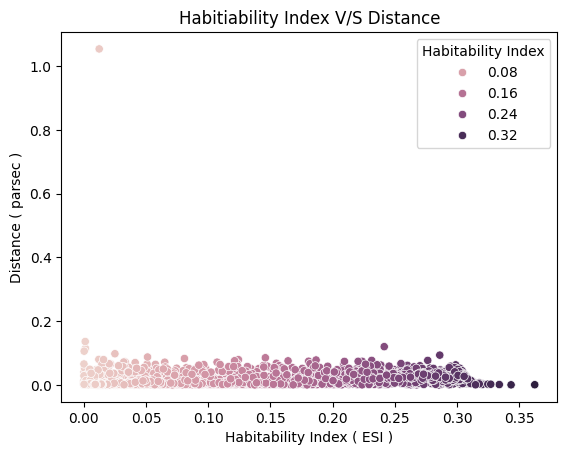

In [50]:
# Sorts the necessary data that is to be plotted
habitability_index = df['ESI'].rename('Habitability Index') # ESI from the DF
Distance = df['Distance'] # Distance from the DF

# Plots the data on the scateerplot - with a differenciation on the hue based off the exoplanet's HI ( Habitability Index )
sns.scatterplot(x=habitability_index,y=Distance,hue=habitability_index)

# Adds the tile
plt.title("Habitiability Index V/S Distance")

# Adds the respective labels to the x and y axes
plt.xlabel("Habitability Index ( ESI )")
plt.ylabel("Distance ( parsec )")

# ADD YOUR OWN DATA


In [47]:
#@markdown - Replace 'your_file.csv' with the appropriate CSV file containing all the data based of the KOI objects of interest
#@markdown ---

# Define the path to your CSV file -  USer Input
csv_file_path = 'your_file.csv'  #@param {type: "string"}

#@markdown ---

# Used to read the csv file and store the data as a pandas dataframe
data = pd.read_csv(csv_file_path)

# Used as constants for calculations
earth_solar_radii = 0.009168
earth_stellar_flux = 1.0

# Lists that are used to store the calculated values from the data
ESI2_scores = []
Mass2 = []
Distance_from_Earth2 = []

# Used for calculaing ESI - as shown above
for i,j in zip(range(len(data)),range(len(data))):
  planet_solar_radii = data['koi_srad'][i]
  planet_stellar_flux = data["koi_insol"][j]
  S = 0.5 * (((planet_stellar_flux - earth_stellar_flux) / (planet_stellar_flux + earth_stellar_flux))**2 +
           ((planet_solar_radii - earth_solar_radii) / (planet_solar_radii + earth_solar_radii))**2)
  ESI = 1 - math.sqrt(S)
  ESI2_scores.append(ESI)



# Used for calculaing Mass - as shown above
for i in range(len(data)):
  planet_solar_radii = data['koi_srad'][i]
  if planet_solar_radii < 1.5:
    mass = planet_solar_radii**2.7
    Mass2.append(mass)
  elif 1.5 <= planet_solar_radii <= 4:
    mass = 1.6 * planet_solar_radii**1.3
    Mass2.append(mass)
  else :
    mass = planet_solar_radii**1
    Mass2.append(mass)

# Store the calculated data into the data frame
data['Mass'] = Mass2


# Used for calculaing Distance - as shown above
for i,j in zip(range(len(data)),range(len(data))):
  mass_of_exoplanet = data['Mass'][i]
  orbital_period = data["koi_period"][j]
  dist = ((gravitational_constant*mass_of_exoplanet)/4*(math.pi**2))*(orbital_period**2)
  distance = math.pow(dist,(1/3))
  Distance_from_Earth2.append(distance)


# Store the calculated data into the data frame
data['ESI'] = ESI2_scores
data['Distance'] = Distance_from_Earth2

# Used to concatennate the two df into one
frames = [df,data]
new_df = pd.concat(frames)

# Used to drop all the duplicate index from the data frame
new_df = new_df.reset_index(drop=True)


# New Visualistaion - Habitability Index V/S Distance

<Axes: xlabel='Habitability Index', ylabel='Distance'>

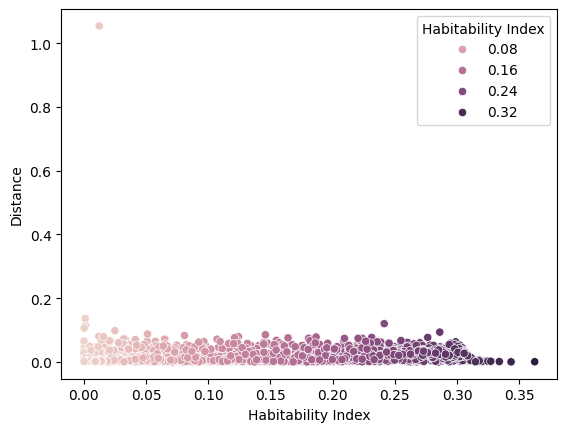

In [44]:
# Sorts the necessary data that is to be plotted
new_habitability_index = new_df['ESI'].rename('Habitability Index')
new_Distance = new_df['Distance']

# Plots the data on the scateerplot - with a differenciation on the hue based off the exoplanet's HI ( Habitability Index )
sns.scatterplot(x=new_habitability_index,y=new_Distance,hue=new_habitability_index)

# Adds the tile
plt.title("Habitiability Index V/S Distance")

# Adds the respective labels to the x and y axes
plt.xlabel("Habitability Index ( ESI )")
plt.ylabel("Distance ( parsec )")

# Download the new dataset

In [45]:
# Used to download the new data frame - ( Note : - Change the name of the CSV file as per desire )
new_df.to_csv('New_Dataset.csv')